In [1]:
%matplotlib inline

import numpy as np
import rasterio
from osgeo import gdal
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import seaborn as sns
from __future__ import division
import pandas as pd
import seaborn

In [2]:
# specify residuals map to read in:
year = '2016'
#year = '2015'

stable='0515'
#stable='0414'

In [72]:
# read in residuals
# *use masked version - non-forest=-9999
residuals_fn = '../paper_data/final_products/{year}_{stable}_meanresiduals_forestmask.tif'.format(year=year, stable=stable)
with rasterio.open(residuals_fn) as image:
    residuals = image.read(1)
print(residuals.shape)

# change from float to int for plotting
residuals = residuals.astype(int)

# display number of unique values
print(np.unique(residuals))

(9729, 12851)
[-9999   -76   -74   -70   -68   -62   -61   -58   -41   -38   -34   -33
   -32   -31   -30   -29   -28   -27   -26   -25   -24   -23   -22   -21
   -20   -19   -18   -17   -16   -15   -14   -13   -12   -11   -10    -9
    -8    -7    -6    -5    -4    -3    -2    -1     0     1     2     3
     4     5     6     7     8     9    10    11    12    13    14    15
    16    17    18    19    20    21    22    23    24    25    26    27
    28    29    30    31    32    33    34    35    36    37    38    39
    40    41    42    43    44    45    46    47    48    49    50    51
    52    53    54    55    56    57    58    59    60    61    62    63
    64    65    66    67    68    69    70    71    72    73    74    75
    76    77    78    79    80    81    82    83    84    85    86    87
    88    89    90    91    92    93    94    95    96    97    98    99
   100   101   102   103   104   105   106   107   108   109   110   111
   112   113   114   115   116   117 

In [4]:
NLCD_fn = '/projectnb/landsat/projects/Massachusetts/Moths/paper_data/final_products/NLCD_forest_mask.tif'
with rasterio.open(NLCD_fn) as image:
    NLCD = image.read(1)
print(NLCD.shape)
print(np.unique(NLCD))

(9729, 12851)
[-9999     0     1]


In [5]:
# read in 2016 aerial assessment - rasterized
aerial_fn = '/projectnb/landsat/projects/Massachusetts/Moths/GIS_data/FS_2016aerial/DFO_GypsyMothData_2017_albers_studyarea_rast.tif'
with rasterio.open(aerial_fn) as image:
    aerial = image.read(1)
print(aerial.shape)

(9729, 12851)


In [142]:
# Read in FHTE datasets
FHTE_fn = '/projectnb/landsat/projects/Massachusetts/Moths/GIS_data/FHTE_ref/FHTE_ZScore_raster.tif'
with rasterio.open(FHTE_fn) as image:
    FHTE = image.read(1)
print(FHTE.shape)

FHTE_s1_fn = '/projectnb/landsat/projects/Massachusetts/Moths/GIS_data/FHTE_ref/FHTE_ZScore_sieve1_raster.tif'
with rasterio.open(FHTE_s1_fn) as image:
    FHTE_s1 = image.read(1)
print(FHTE_s1.shape)

FHTE_s2_fn = '/projectnb/landsat/projects/Massachusetts/Moths/GIS_data/FHTE_ref/FHTE_ZScore_sieve2_raster.tif'
with rasterio.open(FHTE_s2_fn) as image:
    FHTE_s2 = image.read(1)
print(FHTE_s2.shape)

(9729, 12851)
(9729, 12851)
(9729, 12851)


In [7]:
# read in 2016 aerial assessment - rasterized
states_fn = '/projectnb/landsat/projects/Massachusetts/Moths/GIS_data/states/study_area_rast.tif'
with rasterio.open(states_fn) as image:
    states = image.read(1)
print(states.shape)

(9729, 12851)


In [8]:
# get unique values and counts for each level of defoliation from aerial maps and FHTE rasters
unique_1, counts_1 = np.unique(residuals[np.where(aerial==1)], return_counts=True)
unique_2, counts_2 = np.unique(residuals[np.where(aerial==2)], return_counts=True)
unique_3, counts_3 = np.unique(residuals[np.where(aerial==3)], return_counts=True)
unique_4, counts_4 = np.unique(residuals[np.where(aerial==4)], return_counts=True)
unique_5, counts_5 = np.unique(residuals[np.where(aerial==5)], return_counts=True)
unique_na, counts_na = np.unique(residuals[np.where(aerial==0)], return_counts=True)
unique_FHTE, counts_FHTE = np.unique(residuals[np.where(FHTE==4) or np.where(FHTE==3)], return_counts=True)
unique_FHTE_na, counts_FHTE_na = np.unique(residuals[np.where(FHTE==1) or np.where(FHTE==2)], return_counts=True)
unique_FHTE_s1, counts_FHTE_s1 = np.unique(residuals[np.where(FHTE_s1==4) or np.where(FHTE_s1==3)], return_counts=True)
unique_FHTE_s2, counts_FHTE_s2 = np.unique(residuals[np.where(FHTE_s2==4) or np.where(FHTE_s2==3)], return_counts=True)

In [9]:
# normalize counts by area in each category of damage
counts_1_norm = (counts_1/counts_1[np.where(unique_1!=-9999)].sum())*100
counts_2_norm = (counts_2/counts_2[np.where(unique_2!=-9999)].sum())*100
counts_3_norm = (counts_3/counts_3[np.where(unique_3!=-9999)].sum())*100
counts_4_norm = (counts_4/counts_4[np.where(unique_4!=-9999)].sum())*100
counts_5_norm = (counts_5/counts_5[np.where(unique_5!=-9999)].sum())*100
counts_na_norm = (counts_na/counts_na[np.where(unique_na!=-9999)].sum())*100
counts_FHTE_norm = (counts_FHTE/counts_FHTE[np.where(unique_FHTE!=-9999)].sum())*100
counts_FHTE_na_norm = (counts_FHTE_na/counts_FHTE_na[np.where(unique_FHTE_na!=-9999)].sum())*100
counts_FHTE_s1_norm = (counts_FHTE_s1/counts_FHTE_s1[np.where(unique_FHTE_s1!=-9999)].sum())*100
counts_FHTE_s2_norm = (counts_FHTE_s2/counts_FHTE_s2[np.where(unique_FHTE_s2!=-9999)].sum())*100

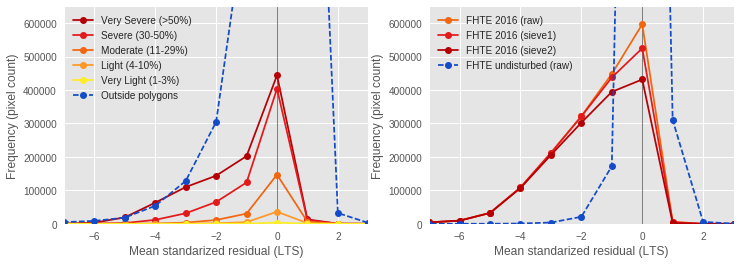

In [10]:
fig = plt.figure(1, figsize=(12, 4))
plt.style.use('ggplot') 
sns.set_palette("Paired")

ax = fig.add_subplot(121)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_5, counts_5, ls='-', marker='o', label='Very Severe (>50%)', color='#b50006')
plt.plot(unique_4, counts_4, ls='-', marker='o', label='Severe (30-50%)', color='#e31a1c')
plt.plot(unique_3, counts_3, ls='-', marker='o', label='Moderate (11-29%)', color='#f1660f')
plt.plot(unique_2, counts_2, ls='-', marker='o', label='Light (4-10%)', color='#fe9929')
plt.plot(unique_1, counts_1, ls='-', marker='o', label='Very Light (1-3%)', color='#feed26')
plt.plot(unique_na, counts_na, ls='--', marker='o', label='Outside polygons', color='#134bc9')
plt.ylabel('Frequency (pixel count)')
plt.ylim(0,650000)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()

ax = fig.add_subplot(122)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_FHTE, counts_FHTE, ls='-', marker='o', label='FHTE 2016 (raw)', color='#f1660f')
plt.plot(unique_FHTE_s1, counts_FHTE_s1, ls='-', marker='o', label='FHTE 2016 (sieve1)', color='#e31a1c')
plt.plot(unique_FHTE_s2, counts_FHTE_s2, ls='-', marker='o', label='FHTE 2016 (sieve2)', color='#b50006')
plt.plot(unique_FHTE_na, counts_FHTE_na, ls='--', marker='o', label='FHTE undisturbed (raw)', color='#134bc9')
plt.ylabel('Frequency (pixel count)')
plt.ylim(0,650000)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()
plt.savefig('../paper_data/figures/Figure_comparisonpanel.png')
plt.show()


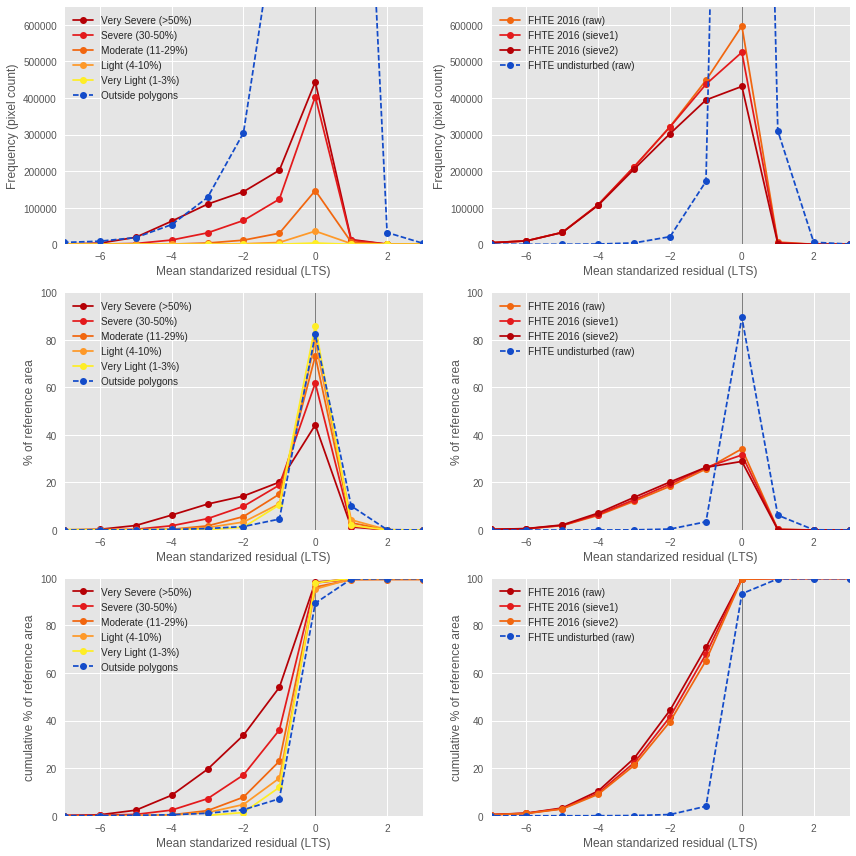

In [11]:
# plot raw counts
# (somewhat problematic because some categories cover much greater area than others)

fig = plt.figure(1, figsize=(12, 12))
sns.set_palette("Paired")

ax = fig.add_subplot(321)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_5, counts_5, ls='-', marker='o', label='Very Severe (>50%)', color='#b50006')
plt.plot(unique_4, counts_4, ls='-', marker='o', label='Severe (30-50%)', color='#e31a1c')
plt.plot(unique_3, counts_3, ls='-', marker='o', label='Moderate (11-29%)', color='#f1660f')
plt.plot(unique_2, counts_2, ls='-', marker='o', label='Light (4-10%)', color='#fe9929')
plt.plot(unique_1, counts_1, ls='-', marker='o', label='Very Light (1-3%)', color='#feed26')
plt.plot(unique_na, counts_na, ls='--', marker='o', label='Outside polygons', color='#134bc9')
plt.ylabel('Frequency (pixel count)')
plt.ylim(0,650000)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()

ax = fig.add_subplot(322)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_FHTE, counts_FHTE, ls='-', marker='o', label='FHTE 2016 (raw)', color='#f1660f')
plt.plot(unique_FHTE_s1, counts_FHTE_s1, ls='-', marker='o', label='FHTE 2016 (sieve1)', color='#e31a1c')
plt.plot(unique_FHTE_s2, counts_FHTE_s2, ls='-', marker='o', label='FHTE 2016 (sieve2)', color='#b50006')
plt.plot(unique_FHTE_na, counts_FHTE_na, ls='--', marker='o', label='FHTE undisturbed (raw)', color='#134bc9')
plt.ylabel('Frequency (pixel count)')
plt.ylim(0,650000)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()


ax = fig.add_subplot(323)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_5, counts_5_norm, ls='-', marker='o', label='Very Severe (>50%)', color='#b50006')
plt.plot(unique_4, counts_4_norm, ls='-', marker='o', label='Severe (30-50%)', color='#e31a1c')
plt.plot(unique_3, counts_3_norm, ls='-', marker='o', label='Moderate (11-29%)', color='#f1660f')
plt.plot(unique_2, counts_2_norm, ls='-', marker='o', label='Light (4-10%)', color='#fe9929')
plt.plot(unique_1, counts_1_norm, ls='-', marker='o', label='Very Light (1-3%)', color='#feed26')
plt.plot(unique_na, counts_na_norm, ls='--', marker='o', label='Outside polygons', color='#134bc9')

plt.ylabel('% of reference area')
plt.ylim(0,100)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()

ax = fig.add_subplot(324)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_FHTE, counts_FHTE_norm, ls='-', marker='o', label='FHTE 2016 (raw)', color='#f1660f')
plt.plot(unique_FHTE_s1, counts_FHTE_s1_norm, ls='-', marker='o', label='FHTE 2016 (sieve1)', color='#e31a1c')
plt.plot(unique_FHTE_s2, counts_FHTE_s2_norm, ls='-', marker='o', label='FHTE 2016 (sieve2)', color='#b50006')
plt.plot(unique_FHTE_na, counts_FHTE_na_norm, ls='--', marker='o', label='FHTE undisturbed (raw)', color='#134bc9') 
plt.ylabel('% of reference area')
plt.ylim(0,100)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()

ax = fig.add_subplot(325)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_5[np.where(unique_5!=-9999)], np.cumsum(counts_5_norm[np.where(unique_5!=-9999)]), 
         ls='-', marker='o', label='Very Severe (>50%)', color='#b50006')
plt.plot(unique_4[np.where(unique_4!=-9999)], np.cumsum(counts_4_norm[np.where(unique_4!=-9999)]), 
         ls='-', marker='o', label='Severe (30-50%)', color='#e31a1c')
plt.plot(unique_3[np.where(unique_3!=-9999)], np.cumsum(counts_3_norm[np.where(unique_3!=-9999)]), 
         ls='-', marker='o', label='Moderate (11-29%)', color='#f1660f')
plt.plot(unique_2[np.where(unique_2!=-9999)], np.cumsum(counts_2_norm[np.where(unique_2!=-9999)]), 
         ls='-', marker='o', label='Light (4-10%)', color='#fe9929')
plt.plot(unique_1[np.where(unique_1!=-9999)], np.cumsum(counts_1_norm[np.where(unique_1!=-9999)]), 
         ls='-', marker='o', label='Very Light (1-3%)', color='#feed26')
plt.plot(unique_na[np.where(unique_na!=-9999)],np.cumsum(counts_na_norm[np.where(unique_na!=-9999)]), 
         ls='--', marker='o', label='Outside polygons', color='#134bc9')
plt.ylabel('cumulative % of reference area')
plt.ylim(0,100)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()

ax = fig.add_subplot(326)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_FHTE_s2[np.where(unique_FHTE_s2!=-9999)], np.cumsum(counts_FHTE_s2_norm[np.where(unique_FHTE_s2!=-9999)]), 
         ls='-', marker='o', label='FHTE 2016 (raw)', color='#b50006')
plt.plot(unique_FHTE_s1[np.where(unique_FHTE_s1!=-9999)], np.cumsum(counts_FHTE_s1_norm[np.where(unique_FHTE_s1!=-9999)]), 
         ls='-', marker='o', label='FHTE 2016 (sieve1)', color='#e31a1c')
plt.plot(unique_FHTE[np.where(unique_FHTE!=-9999)], np.cumsum(counts_FHTE_norm[np.where(unique_FHTE!=-9999)]), 
         ls='-', marker='o', label='FHTE 2016 (sieve2)', color='#f1660f')
plt.plot(unique_FHTE_na[np.where(unique_FHTE_na!=-9999)], np.cumsum(counts_FHTE_na_norm[np.where(unique_FHTE_na!=-9999)]), 
         ls='--', marker='o', label='FHTE undisturbed (raw)',  color='#134bc9')
plt.ylabel('cumulative % of reference area')
plt.ylim(0,100)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
plt.legend()

plt.tight_layout()
plt.savefig('../paper_data/figures/Figure_comparisonpanel_full.png')
plt.show()


In [12]:
# Area stats for Rhode Island
#RI = states[(states == 44) & (residuals != -9999)].shape[0]
RI = states[(states == 44) & (NLCD == 1)].shape[0]
RI_km2 = (RI*30*30)/(1000*1000)
print("Total forested area: {RI} km2".format(RI=RI_km2))

RI_5 = aerial[((aerial == 5) & (states == 44)& (residuals != -9999))].shape[0]
RI_5_km2 = (RI_5*30*30)/(1000*1000)

RI_4 = aerial[((aerial == 4) & (states == 44) & (residuals != -9999))].shape[0]
RI_4_km2 = (RI_4*30*30)/(1000*1000)

RI_3 = aerial[((aerial == 3) & (states == 44) & (residuals != -9999))].shape[0]
RI_3_km2 = (RI_3*30*30)/(1000*1000)

print("Area from aerial: {aerial} km2 - >50% ({perc}%)".format(aerial=RI_5_km2, perc=(RI_5_km2/RI_km2)*100))

aerial_45_km2 = RI_4_km2 + RI_5_km2
print("Area from aerial: {aerial} km2 - >30% ({perc}%)".format(aerial=aerial_45_km2, perc=(aerial_45_km2/RI_km2)*100))

aerial_345_km2 = RI_3_km2 + RI_4_km2 + RI_5_km2
print("Area from aerial: {aerial} km2 - >11% ({perc}%)".format(aerial=aerial_345_km2, perc=(aerial_345_km2/RI_km2)*100))

FHTE_4 = FHTE_s2[(states == 44) & (FHTE_s2 ==4) & (residuals != -9999)].shape[0]
FHTE_3 = FHTE_s2[(states == 44) & (FHTE_s2 ==3) & (residuals != -9999)].shape[0]
FHTE_km2 = ((FHTE_4 + FHTE_3)*30*30)/(1000*1000)
print("Area from FHTE: {FHTE} km2 ({perc}%)".format(FHTE=FHTE_km2, perc=(FHTE_km2/RI_km2)*100))

level = -1
LTS = residuals[(states == 44) & (residuals <= level) & (residuals != -9999)].shape[0]
LTS_km2 = (LTS*30*30)/(1000*1000)
print("Area from LTS @ {level}: {LTS} km2 ({perc}%)".format(LTS=LTS_km2,level=level,  perc=(LTS_km2/RI_km2)*100))
level = -2
LTS = residuals[(states == 44) & (residuals <= level) & (residuals != -9999)].shape[0]
LTS_km2 = (LTS*30*30)/(1000*1000)
print("Area from LTS @ {level}: {LTS} km2 ({perc}%)".format(LTS=LTS_km2, level=level, perc=(LTS_km2/RI_km2)*100))
level = -3
LTS = residuals[(states == 44) & (residuals <= level) & (residuals != -9999)].shape[0]
LTS_km2 = (LTS*30*30)/(1000*1000)
print("Area from LTS @ {level}: {LTS} km2 ({perc}%)".format(LTS=LTS_km2, level=level, perc=(LTS_km2/RI_km2)*100))



Total forested area: 1252.6857 km2
Area from aerial: 448.4718 km2 - >50% (35.8008237821%)
Area from aerial: 519.9399 km2 - >30% (41.5060138389%)
Area from aerial: 524.5389 km2 - >11% (41.8731450355%)
Area from FHTE: 640.7838 km2 (51.1527991419%)
Area from LTS @ -1: 617.8779 km2 (49.3242558768%)
Area from LTS @ -2: 386.5941 km2 (30.8612208154%)
Area from LTS @ -3: 220.4811 km2 (17.6006719004%)


In [144]:
# read in residuals
# *use masked version - non-forest=-9999
residuals_fn = '../paper_data/final_products/{year}_{stable}_meanresiduals_forestmask.tif'.format(year=year, stable=stable)
with rasterio.open(residuals_fn) as image:
    residuals = image.read(1)
print(residuals.shape)

(9729, 12851)


In [136]:
residuals_2 = residuals[np.where(aerial >= 2)]
residuals_2 = residuals_2.reshape(residuals_2.size)

residuals_3 = residuals[np.where(aerial >= 3)]
residuals_3 = residuals_3.reshape(residuals_3.size)

residuals_4 = residuals[np.where(aerial >= 4)]
residuals_4 = residuals_4.reshape(residuals_4.size)

residuals_5 = residuals[np.where(aerial == 5)]
residuals_5 = residuals_5.reshape(residuals_5.size)

residuals_na = residuals[np.where(aerial == 0)]
residuals_na = residuals_na.reshape(residuals_na.size)

In [145]:
res_FHTE = residuals[np.where(FHTE==4) or np.where(FHTE==3)]
res_FHTE = res_FHTE.reshape(res_FHTE.size)

res_FHTE_s1 = residuals[np.where(FHTE_s1==4) or np.where(FHTE_s1==3)]
res_FHTE_s1 = res_FHTE_s1.reshape(res_FHTE_s1.size)

res_FHTE_s2 = residuals[np.where(FHTE_s2==4) or np.where(FHTE_s2==3)]
res_FHTE_s2 = res_FHTE_s2.reshape(res_FHTE_s2.size)

res_FHTE_na = residuals[np.where(FHTE_s2==1) or np.where(FHTE_s2==2)]
res_FHTE_na = res_FHTE_na.reshape(res_FHTE_na.size)

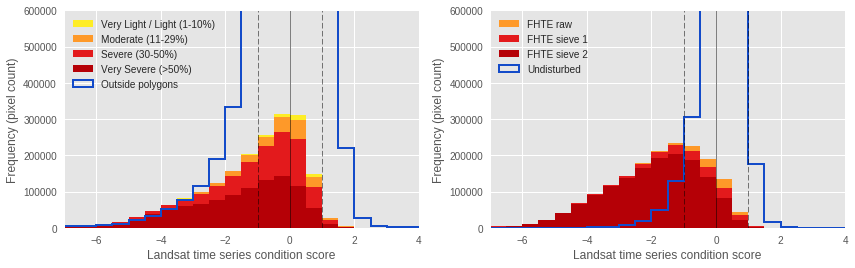

In [150]:
bins = np.arange(-10, 10, 0.5)

fig = plt.figure(1, figsize=(14,4))

ax = fig.add_subplot(121)
seaborn.distplot(residuals_2, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Very Light / Light (1-10%)',
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#feed26"})

seaborn.distplot(residuals_3, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Moderate (11-29%)', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#fe9929"})

seaborn.distplot(residuals_4, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Severe (30-50%)', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#e31a1c"})

seaborn.distplot(residuals_5, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Very Severe (>50%)', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#b50006"})

seaborn.distplot(residuals_na, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Outside polygons', \
                 hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "color": "#134bc9"})

plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) 
plt.axvline(-1, lw=1, color='k', ls='--', alpha=0.5)
plt.axvline(1, lw=1, color='k', ls='--', alpha=0.5)
plt.ylabel('Frequency (pixel count)')
plt.xlabel('Landsat time series condition score')
plt.ylim((0, 600000))
plt.xlim((-7, 4))
plt.legend()

ax = fig.add_subplot(122)
seaborn.distplot(res_FHTE, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='FHTE raw', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#fe9929"})

seaborn.distplot(res_FHTE_s1, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='FHTE sieve 1', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#e31a1c"})

seaborn.distplot(res_FHTE_s2, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='FHTE sieve 2', \
                 hist_kws={"histtype": "stepfilled", "linewidth": 1.5, "alpha": 1, "color": "#b50006"})

seaborn.distplot(res_FHTE_na, hist=True, bins=bins, kde=False, norm_hist=False, \
                 label='Undisturbed', \
                 hist_kws={"histtype": "step", "linewidth": 2, "alpha": 1, "color": "#134bc9"})
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) 
plt.axvline(-1, lw=1, color='k', ls='--', alpha=0.5)
plt.axvline(1, lw=1, color='k', ls='--', alpha=0.5)
plt.ylabel('Frequency (pixel count)')
plt.xlabel('Landsat time series condition score')
plt.ylim((0, 600000))
plt.xlim((-7, 4))
plt.legend()

plt.show()

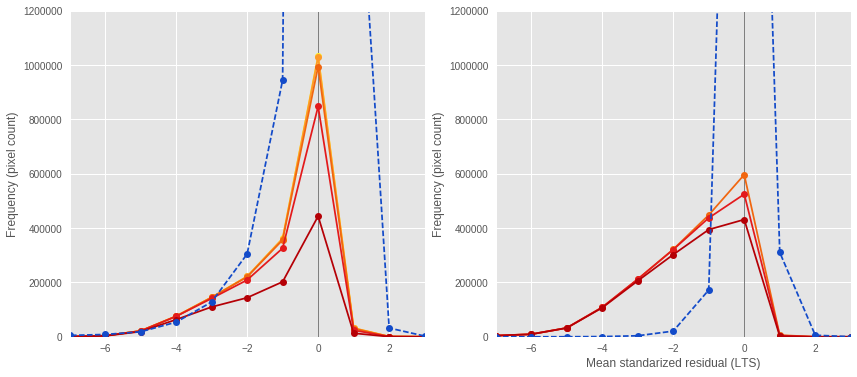

In [82]:
fig = plt.figure(1, figsize=(14, 6))
plt.style.use('ggplot') 
sns.set_palette("Paired")

ax = fig.add_subplot(121)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_1, counts_1, ls='-', marker='o', label='Very Light (1-3%)', color='#feed26')
plt.plot(unique_2, counts_2, ls='-', marker='o', label='Light (4-10%)', color='#fe9929')
plt.plot(unique_3, counts_3, ls='-', marker='o', label='Moderate (11-29%)', color='#f1660f')
plt.plot(unique_4, counts_4, ls='-', marker='o', label='Severe (30-50%)', color='#e31a1c')
plt.plot(unique_5, counts_5, ls='-', marker='o', label='Very Severe (>50%)', color='#b50006')
plt.plot(unique_na, counts_na, ls='--', marker='o', label='Outside polygons', color='#134bc9')
plt.ylabel('Frequency (pixel count)')
plt.ylim(0,1200000)
#plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
#plt.legend()

ax = fig.add_subplot(122)
plt.axvline(0, lw=1, color='k', ls='-', alpha=0.5) # add y=0 reference line 
plt.plot(unique_FHTE, counts_FHTE, ls='-', marker='o', label='FHTE 2016 (raw)', color='#f1660f')
plt.plot(unique_FHTE_s1, counts_FHTE_s1, ls='-', marker='o', label='FHTE 2016 (sieve1)', color='#e31a1c')
plt.plot(unique_FHTE_s2, counts_FHTE_s2, ls='-', marker='o', label='FHTE 2016 (sieve2)', color='#b50006')
plt.plot(unique_FHTE_na, counts_FHTE_na, ls='--', marker='o', label='FHTE undisturbed (raw)', color='#134bc9')
plt.ylabel('Frequency (pixel count)')
plt.ylim(0,1200000)
plt.xlabel('Mean standarized residual (LTS)')
plt.xlim(-7,3)
#plt.legend()
#plt.savefig('../paper_data/figures/Figure_comparisonpanel.png')
plt.show()
